# Sebastián Rodríguez
# 20003076

                    # Práctica 2

In [19]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
def mostrar_digito(digito):
    digito = digito.reshape(8, 8)
    plt.imshow(digito, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
x.shape

(1797, 64)

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
pca = PCA(n_components = 2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


In [12]:
X2D = pca.transform(x) #new features matrix
X2D

array([[ -1.25946604,  21.27488332],
       [  7.95761179, -20.76869895],
       [  6.99192232,  -9.9559863 ],
       ...,
       [ 10.80128408,  -6.9602524 ],
       [ -4.87210058,  12.42395369],
       [ -0.34438989,   6.36554916]])

In [13]:
print(x.shape)
print(X2D.shape)

(1797, 64)
(1797, 2)


###### Verificar el shape de 1797,2  para la comparación contra T-sne más adelante.

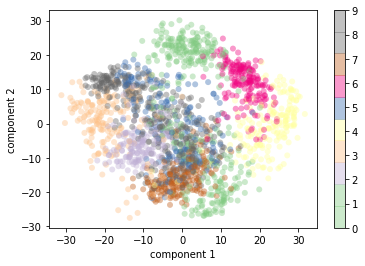

In [18]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


In [21]:
X_tsne = TSNE(n_components=2).fit_transform(x)
X_tsne.shape

(1797, 2)

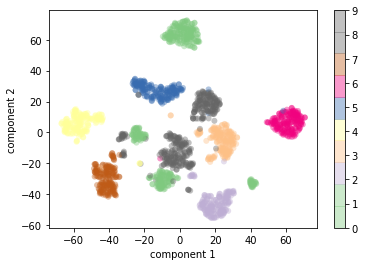

In [23]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=digits.target, edgecolor='none', alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#### Podemos apreciar que la distribución quedo más esparcida entre las diferentes componentes con la herramienta de T-sne. Si bien la herramienta se utiliza para convertir similitudes de data entre distintos puntos para unir probabilidades y minimizar la divergencia es posible que tengamos que utilizar diferentes variables de inicializaciòn para obtener mejores resultados y mejorar el tiempo de procesamiento.

In [24]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X2D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
centers = kmeans.cluster_centers_
kmeans.cluster_centers_.shape

(10, 2)

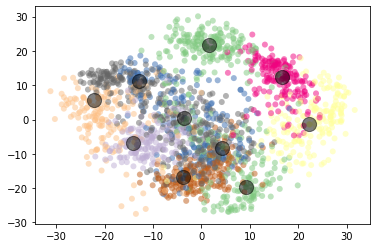

In [27]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [29]:
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
#            c=digits.target, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('Accent', 10))
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Al tener múltiples datos entrelazados podemos apreciar que no existe una similitud entre los centros elegidos por lo que no hay una caracterìstica que resalte más que otra. 

### Lo que si podemos apreciar es que se forman dos diferentes grupos en particular los cuales son nuestros mejores "guess" para deducir que el 70% de la población se encuentra entre los 7 centros más cercanos a la esquina inferior izquierda. Nuestros clusters pueden darnos la informaciòn necesaria para saber las características más "populares" del dataset. 